# The Sparks Foundation: Data Science and Business Analytics Internship Grip July-2021

# Task-1 Prediction Using Supervised Machine Learning 

# Problem Statement:

What will be predicted score if a student studies for 9.25 hrs/ day?

# Steps:

1: importing the dataset






    

2:Visualizing the Data

3: Data Preparation

4: Training the algorithm

5: Visualizing the Model

6: Making Predictions

7: Evaluating Model

# Step-1 Importing the Dataset

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
import warnings as wg
wg.filterwarnings("ignore")

In [10]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
Data=pd.read_csv(url)
    

In [11]:
Data.head() # to check first five values of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
Data.tail()# to check last five values of data

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [15]:
Data.shape # to check the shape of data

(25, 2)

In [16]:
Data.info # to find the more information on data

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [20]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
Data.isnull().sum() # to chech whether data has any null values.

Hours     0
Scores    0
dtype: int64

since, we have no null values, we can move to next step. 

# Step-2: Visualizing the dataset

in this we will plot the dataset to check whether we can observe any relation between two variables or not.

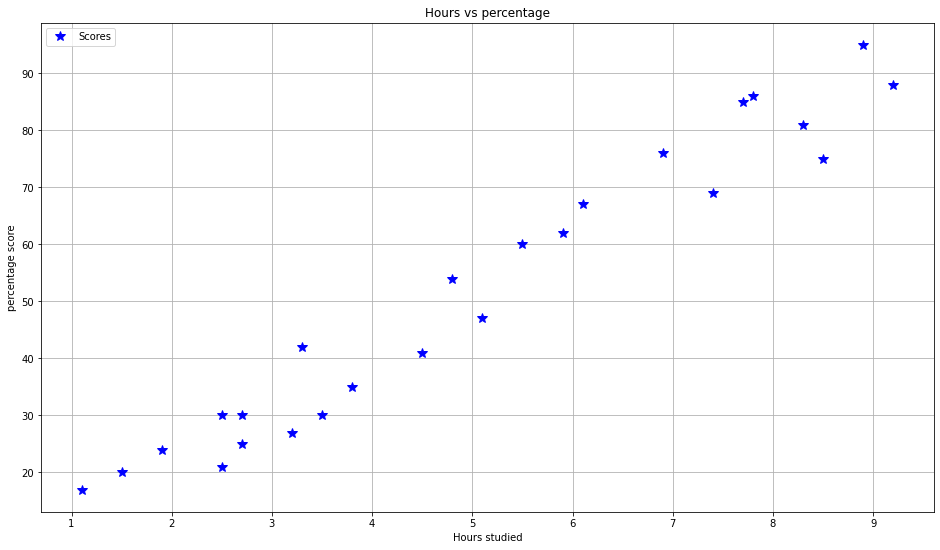

In [26]:
plt.rcParams["figure.figsize"]=[16,9]
Data.plot(x='Hours',y='Scores',style='*',color='blue',markersize=10)
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('percentage score')
plt.grid()
plt.show()

from graph above we can observe  that there is linear relationship between "hours studied" and ""percentage score".so we can use linear regrassion supervised machine learning model on it to predict further values

In [30]:
# to check the correlation 
Data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Step-3: Data preparation

In this step we will divide data in to " features "(inputs) and "label"(outputs) after that we will split whole dataset into 2 parts training data and testing data.

In [39]:
#using iloc function we will divide data
X=Data.iloc[:,:1].values
Y=Data.iloc[:,1:].values

In [40]:
X #(this contains no. of hours studied)


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [41]:
Y #(this contains score)

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

splitting dataset into training and testing data

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Step-4: training the algorithms

We have splitted the data into training  and testing datasets and now will train the model

In [44]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

# Step-5:Visualizing the Model

After training the model now it's time to visualize it

In [45]:
line=model.coef_*X+model.intercept_

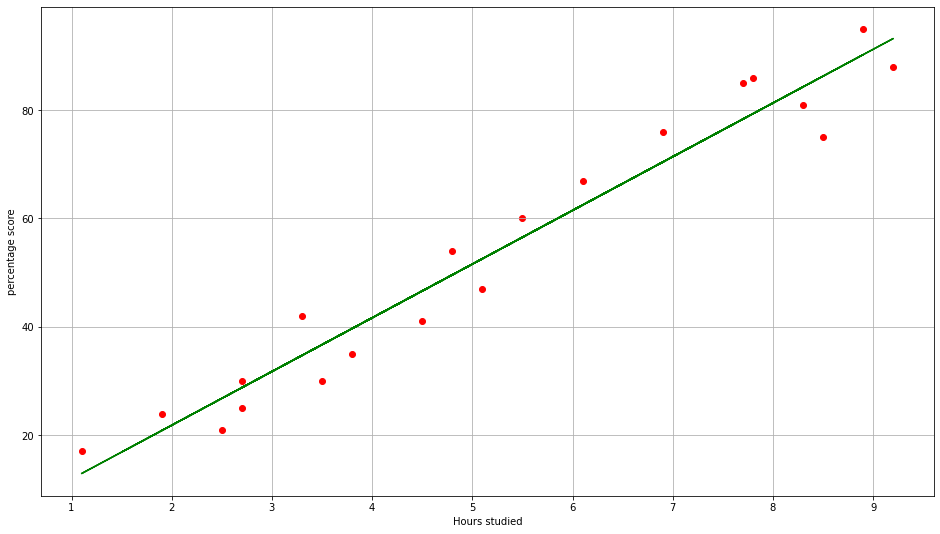

In [47]:
#plotting the training data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(X_train,Y_train,color='red')
plt.plot(X,line,color='green')
plt.xlabel('Hours studied')
plt.ylabel('percentage score')
plt.grid()
plt.show()

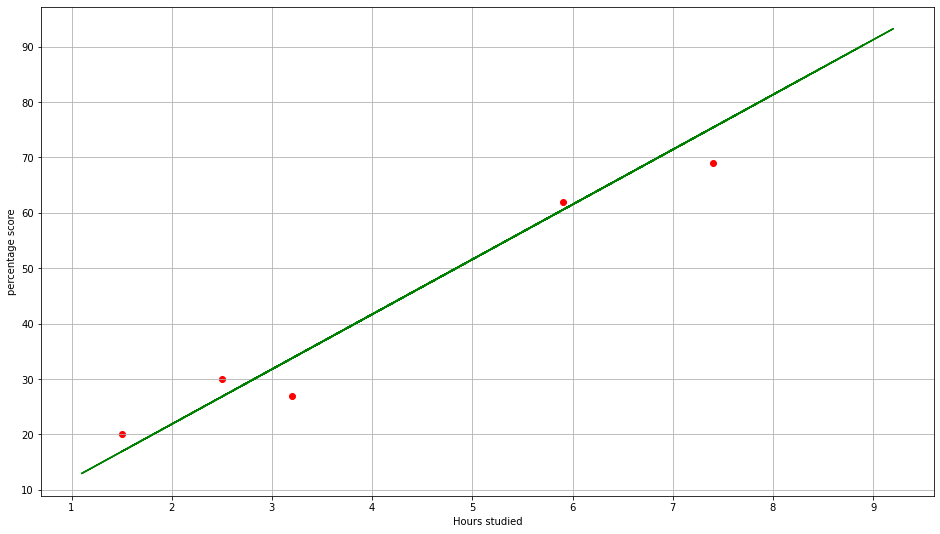

In [48]:
#plotting for the testing data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(X_test,Y_test,color='red')
plt.plot(X,line,color='green')
plt.xlabel('Hours studied')
plt.ylabel('percentage score')
plt.grid()
plt.show()

# Step-6: Making Predictions

Now it's time to make some predictions.

In [49]:
print(X_test)# testing data in hours
Y_pred=model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [50]:
#comparing actual vs predicted
Y_test
Y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [52]:
comp=pd.DataFrame({'Actual':[Y_test],'predicted':[Y_pred]})
comp

,Actual,predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [54]:
#testing with your own data
hours=9.25
own_pred=model.predict([[hours]])
print("the predicted score,if a person studies for",hours,"hours is",own_pred[0])


the predicted score,if a person studies for 9.25 hours is [93.69173249]


# Step-7: Evaluating the model

Calculating mean absolute error

In [56]:
from sklearn import metrics
print('mean absolute error',metrics.mean_absolute_error(Y_test,Y_pred))

mean absolute error 4.183859899002975
